# Praca domowa - obraz


Najpierw upewnijmy się, że pracujemy na GPU. 

* Włącz GPU (Runtime / Change runtime type)

## MNIST



### Wczytanie i wizualizacja

* Wczytaj dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [20]:
from keras.datasets import mnist as df  # keras.datasets.mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = df.load_data()

Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [21]:
#Instancje treningowe
print(x_train.shape)
print(y_train.shape)
#Instancje testowe
print(x_test.shape)
print(y_test.shape)
#Wymiary obrazka
print(x_train[0].shape)
#Ilosc bajtow
print(x_train[0][0][0].nbytes)
#Minimalna wartosc
print(x_train.min())
#Maksymalna wartosc
print(x_train.max())
#Ilość kanałów
print(x_train.shape[-1] if x_train.ndim == 3 else 1)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(28, 28)
1
0
255
28


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

5


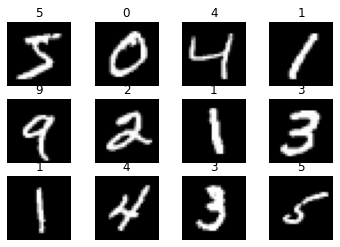

In [8]:
import matplotlib.pyplot as plt

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

print(y_train[0])


* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

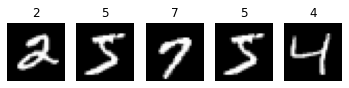

In [9]:
import pandas as pd
#indeks 25754,

my_index_list = [2,5,7,5,4]
idx = [list(y_train).index(i) for i in my_index_list]

for i, j in enumerate(idx):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[j], cmap='gray')
    plt.title(y_train[j])
    plt.axis('off')

### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [22]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [39]:
from keras.utils.np_utils import to_categorical

num = [1,2,4]
idx = [list(y_train).index(i) for i in my_index_list]
idx_num = [list(y_train).index(i) for i in num]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train_en = to_categorical(y_train)
print(x_train[:10], y_test[:10])




[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [12]:
for i,j in enumerate(idx):
    print(y_train_en[j])
print('\n')
for i,j in enumerate(idx_num):
    print(y_train_en[j])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [24]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else: # channels_last
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

print(x_train[0].shape)
print(x_test[0].shape)

(28, 28, 1)
(28, 28, 1)


#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [40]:
input_shape = (28, 28, 1)

model = Sequential(
    [
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
    ]
)

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

In [41]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
model.summary()

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flat

* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

Odp: Po usunięciu paddingu zmienił się kształt danych, tzn. zmniejszyła się ich ilość (z 28x28 na 26x26). Dodatkowo zmiany uległy też kolejne warstwy ze względu na pierwotną zmianę kształtu. Stało się tak ze względu, że padding='same' daje nam na "wyjściu" ten sam kształt danych co na wejściu. Sam argument padding mówi nam o tym co zrobić kiedy dane kernela nie pasują do rozmiaru danych.

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:


Odp:
1. Tak, warstwa `Conv2D` uczy się w trakcie treningu, dzięki mapom aktywacji.
2. Jak możemy zobaczyć w podsumowaniu `maxpooling` zmniejsza rozmiar macierzy z 28x28 na 14x14, zachowując przy tym informacje zawartą w obrazie. Dlatego odpowiadając na pytanie, ta warstwa nie uczy się w czasie treningu.
3. Warstwa `Flatten` jak sama nazwa wskazuje, spłaszcza dane do 1-wymiarowego wektora. Jest to potrzebne ze względu na to, że warstwa Dense nie umie przyjąć danych o dużej głębokości (przerabia je do 1-wymiarowego wektora).
4. Mówi nam o tym pierwszy parametr - będziemy mieć 16 map aktywacji.

Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

In [44]:
model.fit(x_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 17s 71ms/step - loss: 0.5041 - accuracy: 0.8636
Epoch 2/100
235/235 [==============================] - 16s 70ms/step - loss: 0.1231 - accuracy: 0.9643
Epoch 3/100
235/235 [==============================] - 17s 70ms/step - loss: 0.0832 - accuracy: 0.9749
Epoch 4/100
235/235 [==============================] - 16s 68ms/step - loss: 0.0666 - accuracy: 0.9802
Epoch 5/100
235/235 [==============================] - 16s 69ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 6/100
235/235 [==============================] - 16s 68ms/step - loss: 0.0506 - accuracy: 0.9841
Epoch 7/100
235/235 [==============================] - 16s 69ms/step - loss: 0.0455 - accuracy: 0.9862
Epoch 8/100
235/235 [==============================] - 16s 69ms/step - loss: 0.0423 - accuracy: 0.9870
Epoch 9/100
235/235 [==============================] - 16s 69ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 10/100
235/235 [==============================] - 16s 69ms/step - l

#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [46]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.0814 - accuracy: 0.9882


[0.08141665905714035, 0.9882000088691711]

In [47]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 2.9828e-05 - accuracy: 1.0000


[2.982785736094229e-05, 1.0]

Wynik zbioru testowego jest oczywiście mniejszy niż wynik zbioru treningowego, ze względu na to, że zbiór treningowy jest tym na czym uczył się algorytm więc wynik można zasymulować jako kolejną iterację algorytmu. Za to zbiór testowy realnie ocenia czy zbiór treningowy jest dobrze nauczony.

## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [53]:
from keras.datasets import fashion_mnist as fashion_df # keras.datasets.mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_df.load_data()

* Wyświetl 12 pierwszych instancji treningowych

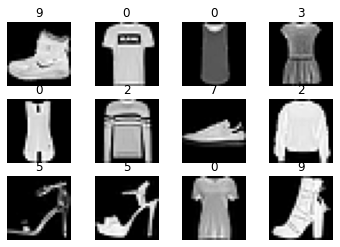

In [55]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [56]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [57]:
input_shape = (28, 28, 1)

model = Sequential(
    [
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
235/235 [==============================] - 16s 67ms/step - loss: 0.7491 - accuracy: 0.7492
Epoch 2/100
235/235 [==============================] - 16s 68ms/step - loss: 0.4127 - accuracy: 0.8527
Epoch 3/100
235/235 [==============================] - 17s 71ms/step - loss: 0.3663 - accuracy: 0.8698
Epoch 4/100
235/235 [==============================] - 18s 78ms/step - loss: 0.3387 - accuracy: 0.8794
Epoch 5/100
235/235 [==============================] - 19s 79ms/step - loss: 0.3184 - accuracy: 0.8871
Epoch 6/100
235/235 [==============================] - 18s 78ms/step - loss: 0.3043 - accuracy: 0.8914
Epoch 7/100
235/235 [==============================] - 17s 72ms/step - loss: 0.2883 - accuracy: 0.8974
Epoch 8/100
235/235 [==============================] - 16s 66ms/step - loss: 0.2804 - accuracy: 0.9008
Epoch 9/100
235/235 [==============================] - 15s 66ms/step - loss: 0.2709 - accuracy: 0.9034
Epoch 10/100
235/235 [==============================] - 15s 65ms/step - l

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [58]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3243 - accuracy: 0.9109


[0.32429197430610657, 0.9108999967575073]

In [59]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0929 - accuracy: 0.9672


[0.09293791651725769, 0.967199981212616]

### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [64]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=5, mode='min')
es1 = EarlyStopping(monitor='loss', patience=5, mode='min')

model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[es])

Epoch 1/100
211/211 [==============================] - 20s 95ms/step - loss: 0.0635 - accuracy: 0.9778 - val_loss: 0.2135 - val_accuracy: 0.9332
Epoch 2/100
211/211 [==============================] - 15s 73ms/step - loss: 0.0630 - accuracy: 0.9775 - val_loss: 0.2143 - val_accuracy: 0.9325
Epoch 3/100
211/211 [==============================] - 15s 72ms/step - loss: 0.0625 - accuracy: 0.9778 - val_loss: 0.2165 - val_accuracy: 0.9298
Epoch 4/100
211/211 [==============================] - 15s 72ms/step - loss: 0.0643 - accuracy: 0.9770 - val_loss: 0.2268 - val_accuracy: 0.9270
Epoch 5/100
211/211 [==============================] - 15s 72ms/step - loss: 0.0642 - accuracy: 0.9773 - val_loss: 0.2223 - val_accuracy: 0.9313
Epoch 6/100
211/211 [==============================] - 17s 83ms/step - loss: 0.0618 - accuracy: 0.9783 - val_loss: 0.2210 - val_accuracy: 0.9322


In [65]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

313/313 [==============================] - 1s 4ms/step - loss: 0.4532 - accuracy: 0.9054
[0.4532390236854553, 0.9053999781608582]
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0707 - accuracy: 0.9769
[0.07066761702299118, 0.9768666625022888]


In [61]:
model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.1, callbacks=[es1])

Epoch 1/100
211/211 [==============================] - 16s 75ms/step - loss: 0.0948 - accuracy: 0.9659 - val_loss: 0.1190 - val_accuracy: 0.9538
Epoch 2/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0984 - accuracy: 0.9640 - val_loss: 0.1225 - val_accuracy: 0.9542
Epoch 3/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0932 - accuracy: 0.9673 - val_loss: 0.1127 - val_accuracy: 0.9563
Epoch 4/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0930 - accuracy: 0.9661 - val_loss: 0.1198 - val_accuracy: 0.9553
Epoch 5/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0920 - accuracy: 0.9672 - val_loss: 0.1199 - val_accuracy: 0.9553
Epoch 6/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0931 - accuracy: 0.9668 - val_loss: 0.1286 - val_accuracy: 0.9512
Epoch 7/100
211/211 [==============================] - 15s 73ms/step - loss: 0.0903 - accuracy: 0.9675 - val_loss: 0.1280 - val_ac

In [63]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

313/313 [==============================] - 1s 4ms/step - loss: 0.4430 - accuracy: 0.9040
[0.4430103003978729, 0.9039999842643738]
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9762
[0.07168471068143845, 0.9762333035469055]


### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

In [67]:
model1 = Sequential([
    Conv2D(32, input_shape=input_shape, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(2, 2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=256, callbacks=[es], validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 16s 73ms/step - loss: 0.0638 - accuracy: 0.9771 - val_loss: 0.1908 - val_accuracy: 0.9388
Epoch 2/100
211/211 [==============================] - 16s 74ms/step - loss: 0.0646 - accuracy: 0.9767 - val_loss: 0.1927 - val_accuracy: 0.9370
Epoch 3/100
211/211 [==============================] - 16s 75ms/step - loss: 0.0597 - accuracy: 0.9796 - val_loss: 0.2001 - val_accuracy: 0.9352
Epoch 4/100
211/211 [==============================] - 21s 102ms/step - loss: 0.0610 - accuracy: 0.9783 - val_loss: 0.1961 - val_accuracy: 0.9347
Epoch 5/100
211/211 [==============================] - 20s 95ms/step - loss: 0.0604 - accuracy: 0.9781 - val_loss: 0.2311 - val_accuracy: 0.9307
Epoch 6/100
211/211 [==============================] - 16s 78ms/step - loss: 0.0589 - accuracy: 0.9795 - val_loss: 0.2052 - val_accuracy: 0.9365


In [68]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

313/313 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.9022
[0.4695228934288025, 0.9021999835968018]
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0690 - accuracy: 0.9776
[0.06904830783605576, 0.977566659450531]


In [70]:
from keras.layers import Dropout

model2 = Sequential([
    Conv2D(32, input_shape=input_shape, kernel_size=(2, 2), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=256, callbacks=[es], validation_split=0.1)

Epoch 1/100
211/211 [==============================] - 16s 75ms/step - loss: 0.0613 - accuracy: 0.9776 - val_loss: 0.2022 - val_accuracy: 0.9337
Epoch 2/100
211/211 [==============================] - 16s 76ms/step - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.2196 - val_accuracy: 0.9325
Epoch 3/100
211/211 [==============================] - 16s 76ms/step - loss: 0.0599 - accuracy: 0.9787 - val_loss: 0.2186 - val_accuracy: 0.9353
Epoch 4/100
211/211 [==============================] - 16s 77ms/step - loss: 0.0601 - accuracy: 0.9783 - val_loss: 0.2222 - val_accuracy: 0.9305
Epoch 5/100
211/211 [==============================] - 17s 81ms/step - loss: 0.0574 - accuracy: 0.9797 - val_loss: 0.2216 - val_accuracy: 0.9312
Epoch 6/100
211/211 [==============================] - 16s 78ms/step - loss: 0.0571 - accuracy: 0.9802 - val_loss: 0.2095 - val_accuracy: 0.9337


In [72]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

313/313 [==============================] - 1s 4ms/step - loss: 0.4766 - accuracy: 0.9019
[0.4766228497028351, 0.9018999934196472]
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0667 - accuracy: 0.9778
[0.06669703125953674, 0.9777833223342896]


In [79]:
model3 = Sequential([
    Conv2D(32, input_shape=input_shape, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='softmax', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=256, callbacks=[es], validation_split=0.2)

Epoch 1/100
188/188 [==============================] - 16s 82ms/step - loss: 0.0532 - accuracy: 0.9816 - val_loss: 0.1585 - val_accuracy: 0.9508
Epoch 2/100
188/188 [==============================] - 17s 91ms/step - loss: 0.0530 - accuracy: 0.9820 - val_loss: 0.1559 - val_accuracy: 0.9510
Epoch 3/100
188/188 [==============================] - 15s 78ms/step - loss: 0.0537 - accuracy: 0.9815 - val_loss: 0.1603 - val_accuracy: 0.9493
Epoch 4/100
188/188 [==============================] - 14s 75ms/step - loss: 0.0528 - accuracy: 0.9818 - val_loss: 0.1736 - val_accuracy: 0.9452
Epoch 5/100
188/188 [==============================] - 14s 76ms/step - loss: 0.0532 - accuracy: 0.9815 - val_loss: 0.1760 - val_accuracy: 0.9460
Epoch 6/100
188/188 [==============================] - 17s 89ms/step - loss: 0.0514 - accuracy: 0.9822 - val_loss: 0.1655 - val_accuracy: 0.9492
Epoch 7/100
188/188 [==============================] - 17s 89ms/step - loss: 0.0514 - accuracy: 0.9819 - val_loss: 0.1721 - val_ac

In [80]:
print(model.evaluate(x_test, y_test))
print(model.evaluate(x_train, y_train))

313/313 [==============================] - 1s 4ms/step - loss: 0.5166 - accuracy: 0.9009
[0.5165824890136719, 0.9009000062942505]
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0732 - accuracy: 0.9765
[0.07319518178701401, 0.9764500260353088]


To wszystko. Dziękuję! 